<a href="https://colab.research.google.com/github/AdrianRuber/03MIAR---Algoritmos-de-Optimizacion/blob/main/Algoritmos_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre: Adrián Ruber

Link: https://colab.research.google.com/drive/1yl03u35_tlwnxqIscge-ipBPnKx1RBi7?usp=sharing

Github: https://github.com/AdrianRuber/03MIAR---Algoritmos-de-Optimizacion.git

In [ ]:
import math

Viaje por el río (Programación dinámica)

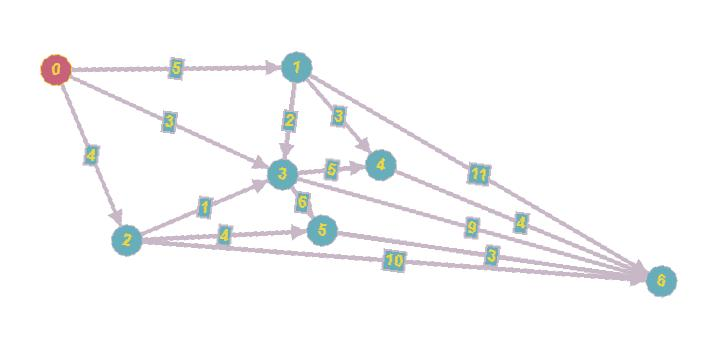

In [ ]:
#se usan los infinitos para poder realizar cálculos numéricos
TARIFAS = [
[0,5,4,3,float("inf"),float("inf"),float("inf")],   #desde nodo 0
[float("inf"),0,float("inf"),2,3,float("inf"),11],  #desde nodo 1
[float("inf"),float("inf"), 0,1,float("inf"),4,10], #desde nodo 2
[float("inf"),float("inf"),float("inf"), 0,5,6,9],
[float("inf"),float("inf"), float("inf"),float("inf"),0,float("inf"),4],
[float("inf"),float("inf"), float("inf"),float("inf"),float("inf"),0,3],
[float("inf"),float("inf"),float("inf"),float("inf"),float("inf"),float("inf"),0]
]
TARIFAS

[[0, 5, 4, 3, inf, inf, inf],
 [inf, 0, inf, 2, 3, inf, 11],
 [inf, inf, 0, 1, inf, 4, 10],
 [inf, inf, inf, 0, 5, 6, 9],
 [inf, inf, inf, inf, 0, inf, 4],
 [inf, inf, inf, inf, inf, 0, 3],
 [inf, inf, inf, inf, inf, inf, 0]]

In [ ]:
def Coste(TARIFAS):
  #Nodos Totales
  N = len(TARIFAS[0])
  
  #Inicialización de la tabla de precios con valores muy altos
  PRECIOS = [ [float("inf")]*N for i in [float("inf")]*N]  
  RUTA = [ [""]*N for i in [""]*N]

  for i in range(N-1):
    for j in range(i+1, N): #Se inicializa en i+1 porque no se quiere ir al propio nodo, sino a los siguientes
      MIN = TARIFAS[i][j] #Minimo para ir de un nodo al otro basado en la tarifa creada anteriormente
      RUTA[i][j] = i
      
      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] ) #Se recorren todos los escenarios posibles de ir de un nodo al otro y se guarda el de menor coste
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN
        
  return PRECIOS,RUTA

Coste(TARIFAS)

([[inf, 5, 4, 3, 8, 8, 11],
  [inf, inf, inf, 2, 3, 8, 7],
  [inf, inf, inf, 1, 6, 4, 7],
  [inf, inf, inf, inf, 5, 6, 9],
  [inf, inf, inf, inf, inf, inf, 4],
  [inf, inf, inf, inf, inf, inf, 3],
  [inf, inf, inf, inf, inf, inf, inf]],
 [['', 0, 0, 0, 1, 2, 5],
  ['', '', 1, 1, 1, 3, 4],
  ['', '', '', 2, 3, 2, 5],
  ['', '', '', '', 3, 3, 3],
  ['', '', '', '', '', 4, 4],
  ['', '', '', '', '', '', 5],
  ['', '', '', '', '', '', '']])

In [ ]:
PRECIOS,RUTA = Coste(TARIFAS)  
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")  
for i in range(len(TARIFAS)):
  print(RUTA[i]) 

PRECIOS
[inf, 5, 4, 3, 8, 8, 11]
[inf, inf, inf, 2, 3, 8, 7]
[inf, inf, inf, 1, 6, 4, 7]
[inf, inf, inf, inf, 5, 6, 9]
[inf, inf, inf, inf, inf, inf, 4]
[inf, inf, inf, inf, inf, inf, 3]
[inf, inf, inf, inf, inf, inf, inf]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [ ]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde 
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta]) 

print("\nLa ruta es:")  
calcular_ruta(RUTA, 2,4) 


La ruta es:


'2,3'

Asignacion de tarea (Ramificación y Poda)

In [ ]:
COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


In [ ]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i] 
  return VALOR

valor((0, 0, ),COSTES) #Tarea 0 al agente 0, tarea 2 al agente 2 (11 + 17)

23

In [ ]:
#Cota inferior
# Las cotas determinan cuándo se puede realizar una poda
def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

#Cota superior 

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

In [ ]:
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS
crear_hijos((0, 1) , 4) #Tarea 0 a agente 0 y tarea 1 a agente 1

[{'s': (0, 1, 2)}, {'s': (0, 1, 3)}, {'s': (0, 1, 4)}]

In [ ]:
def ramificacion_y_poda(COSTES):
  DIMENSION = len(COSTES)  
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )
  print(CI((0, ),COSTES))

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']

    #Ramificacion y se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0: 
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL
 
    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos 
    NODOS.extend(HIJOS) 

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]
   
  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )
      


ramificacion_y_poda(COSTES)

60
La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


In [ ]:
COSTES1=[[3, 2, 8, 3, 7],
        [4, 5, 2, 9, 2],
        [2, 1, 8, 3, 9],
        [7, 2, 5, 8, 10],
        [2, 4, 6, 8, 1]]
ramificacion_y_poda(COSTES1)

9
La solucion final es: [{'s': (3, 2, 0, 1, 4), 'ci': 10}]  en  57  iteraciones  para dimension:  5


In [ ]:
COSTES2=[[3, 2, 8, 3, 7, 5],
        [4, 5, 2, 9, 2, 3],
        [2, 1, 8, 3, 9, 7],
        [7, 2, 5, 8, 10, 9],
        [2, 4, 6, 8, 1, 9],
        [5, 9, 2, 5, 2, 1]]
ramificacion_y_poda(COSTES2)

10
La solucion final es: [{'s': (3, 2, 0, 1, 4, 5), 'ci': 11}]  en  109  iteraciones  para dimension:  6


In [ ]:
COSTES3=[[3, 2, 8, 3, 7, 5, 2],
        [4, 5, 2, 9, 2, 3, 7],
        [2, 1, 8, 3, 9, 7, 8],
        [7, 2, 5, 8, 10,9,6],
        [2, 4, 6, 8, 1, 9, 4],
        [5, 9, 2, 5, 2, 1, 7],
        [1, 2, 6, 2, 6, 4, 9]]
ramificacion_y_poda(COSTES3)

10
La solucion final es: [{'s': (6, 2, 0, 1, 4, 5, 3), 'ci': 12}]  en  526  iteraciones  para dimension:  7


In [ ]:
import itertools
def fuerza_bruta(COSTES):
  mejor_valor = 10e10
  mejor_solucion = ()

  for s in list(itertools.permutations(range(len(COSTES)))):
    valor_tmp = valor(s, COSTES)
    if valor_tmp < mejor_valor:
      mejor_valor = valor_tmp
      mejor_solucion = s
    print("La mejor solución es: " , mejor_solucion, " con valor: ", mejor_valor)

In [ ]:
fuerza_bruta(COSTES)


La mejor solución es:  (0, 1, 2, 3)  con valor:  73
La mejor solución es:  (0, 1, 3, 2)  con valor:  69
La mejor solución es:  (0, 1, 3, 2)  con valor:  69
La mejor solución es:  (0, 1, 3, 2)  con valor:  69
La mejor solución es:  (0, 3, 1, 2)  con valor:  61
La mejor solución es:  (0, 3, 1, 2)  con valor:  61
La mejor solución es:  (0, 3, 1, 2)  con valor:  61
La mejor solución es:  (0, 3, 1, 2)  con valor:  61
La mejor solución es:  (0, 3, 1, 2)  con valor:  61
La mejor solución es:  (0, 3, 1, 2)  con valor:  61
La mejor solución es:  (0, 3, 1, 2)  con valor:  61
La mejor solución es:  (0, 3, 1, 2)  con valor:  61
La mejor solución es:  (0, 3, 1, 2)  con valor:  61
La mejor solución es:  (0, 3, 1, 2)  con valor:  61
La mejor solución es:  (0, 3, 1, 2)  con valor:  61
La mejor solución es:  (0, 3, 1, 2)  con valor:  61
La mejor solución es:  (0, 3, 1, 2)  con valor:  61
La mejor solución es:  (0, 3, 1, 2)  con valor:  61
La mejor solución es:  (0, 3, 1, 2)  con valor:  61
La mejor sol

In [ ]:
fuerza_bruta(COSTES1)


La mejor solución es:  (0, 1, 2, 3, 4)  con valor:  25
La mejor solución es:  (0, 1, 2, 3, 4)  con valor:  25
La mejor solución es:  (0, 1, 3, 2, 4)  con valor:  17
La mejor solución es:  (0, 1, 3, 2, 4)  con valor:  17
La mejor solución es:  (0, 1, 3, 2, 4)  con valor:  17
La mejor solución es:  (0, 1, 3, 2, 4)  con valor:  17
La mejor solución es:  (0, 2, 1, 3, 4)  con valor:  15
La mejor solución es:  (0, 2, 1, 3, 4)  con valor:  15
La mejor solución es:  (0, 2, 1, 3, 4)  con valor:  15
La mejor solución es:  (0, 2, 1, 3, 4)  con valor:  15
La mejor solución es:  (0, 2, 1, 3, 4)  con valor:  15
La mejor solución es:  (0, 2, 1, 3, 4)  con valor:  15
La mejor solución es:  (0, 3, 1, 2, 4)  con valor:  11
La mejor solución es:  (0, 3, 1, 2, 4)  con valor:  11
La mejor solución es:  (0, 3, 1, 2, 4)  con valor:  11
La mejor solución es:  (0, 3, 1, 2, 4)  con valor:  11
La mejor solución es:  (0, 3, 1, 2, 4)  con valor:  11
La mejor solución es:  (0, 3, 1, 2, 4)  con valor:  11
La mejor s

In [ ]:
fuerza_bruta(COSTES2)

La mejor solución es:  (0, 1, 2, 3, 4, 5)  con valor:  26
La mejor solución es:  (0, 1, 2, 3, 4, 5)  con valor:  26
La mejor solución es:  (0, 1, 2, 3, 4, 5)  con valor:  26
La mejor solución es:  (0, 1, 2, 3, 4, 5)  con valor:  26
La mejor solución es:  (0, 1, 2, 3, 4, 5)  con valor:  26
La mejor solución es:  (0, 1, 2, 3, 4, 5)  con valor:  26
La mejor solución es:  (0, 1, 3, 2, 4, 5)  con valor:  18
La mejor solución es:  (0, 1, 3, 2, 4, 5)  con valor:  18
La mejor solución es:  (0, 1, 3, 2, 4, 5)  con valor:  18
La mejor solución es:  (0, 1, 3, 2, 4, 5)  con valor:  18
La mejor solución es:  (0, 1, 3, 2, 4, 5)  con valor:  18
La mejor solución es:  (0, 1, 3, 2, 4, 5)  con valor:  18
La mejor solución es:  (0, 1, 3, 2, 4, 5)  con valor:  18
La mejor solución es:  (0, 1, 3, 2, 4, 5)  con valor:  18
La mejor solución es:  (0, 1, 3, 2, 4, 5)  con valor:  18
La mejor solución es:  (0, 1, 3, 2, 4, 5)  con valor:  18
La mejor solución es:  (0, 1, 3, 2, 4, 5)  con valor:  18
La mejor soluc

In [ ]:

fuerza_bruta(COSTES3)

Se han truncado las últimas 5000 líneas del flujo de salida.
La mejor solución es:  (0, 1, 2, 6, 4, 5, 3)  con valor:  26
La mejor solución es:  (0, 1, 2, 6, 4, 5, 3)  con valor:  26
La mejor solución es:  (0, 1, 2, 6, 4, 5, 3)  con valor:  26
La mejor solución es:  (0, 1, 2, 6, 4, 5, 3)  con valor:  26
La mejor solución es:  (0, 1, 2, 6, 4, 5, 3)  con valor:  26
La mejor solución es:  (0, 1, 3, 6, 4, 5, 2)  con valor:  25
La mejor solución es:  (0, 1, 3, 6, 4, 5, 2)  con valor:  25
La mejor solución es:  (0, 1, 3, 6, 4, 5, 2)  con valor:  25
La mejor solución es:  (0, 1, 3, 6, 4, 5, 2)  con valor:  25
La mejor solución es:  (0, 1, 3, 6, 4, 5, 2)  con valor:  25
La mejor solución es:  (0, 1, 3, 6, 4, 5, 2)  con valor:  25
La mejor solución es:  (0, 1, 3, 6, 4, 5, 2)  con valor:  25
La mejor solución es:  (0, 1, 3, 6, 4, 5, 2)  con valor:  25
La mejor solución es:  (0, 1, 3, 6, 4, 5, 2)  con valor:  25
La mejor solución es:  (0, 1, 3, 6, 4, 5, 2)  con valor:  25
La mejor solución es:  (

Para fuerza bruta, a partir de la dimensión 4 el algoritmo por fuerza bruta
deja de ser una opción, ya que realiza demasiadas iteraciones.
Así como la poda a partir de las dimensión 6, que ya soberpasa las 100 iteraciones, dejaría de ser util, ya que con dimensión 7 se realizan más de 500 iteraciones, las que a mi parecer son demasiadas.
